In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


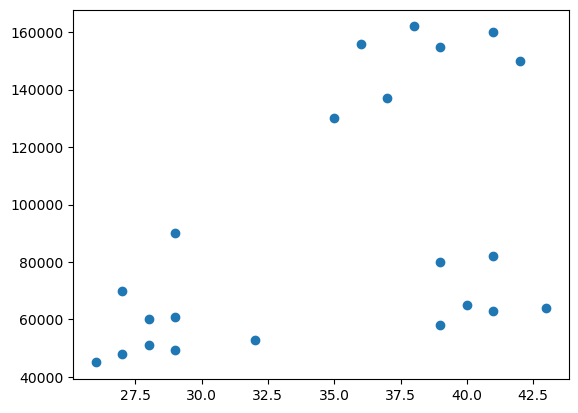

In [3]:
plt.scatter(df['Age'],df['Income($)'])
plt.show()

In [16]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[['Age','Income($)']])
scaled_df

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [17]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [19]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [20]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

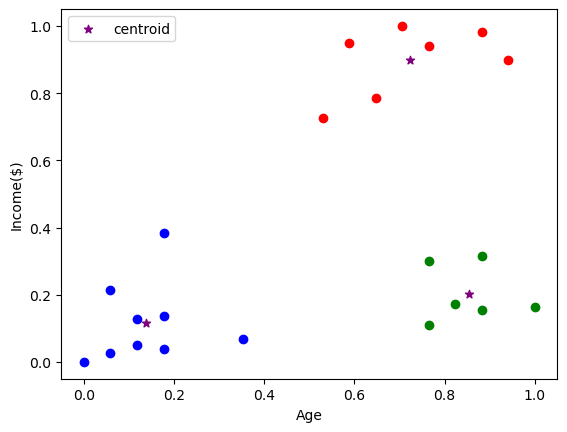

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [22]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_df)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [23]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2818479744366238,
 0.22395807059250117,
 0.16858512236029757,
 0.13265419827245162,
 0.10383752586603559]

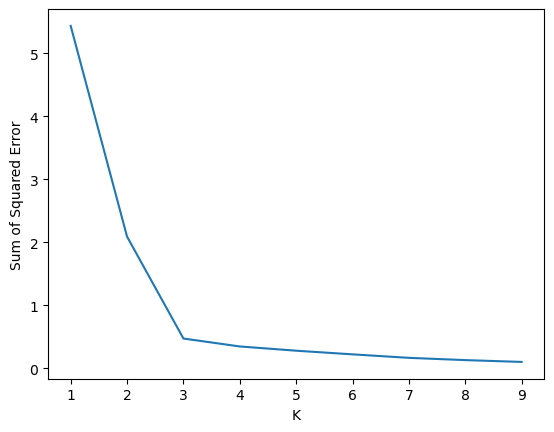

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sse)
plt.show()